# **Project 1**
Kuei-Tzu Hu 206300553

Sreya Muppalla 505675909

Christina Lee 406299676


# Dataset

## Question 1 : Data Analysis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import math
import numpy as np
import random
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ECE ENGR 219/Project1-ClassificationDataset.csv')

In [ ]:
df.shape

(3476, 8)

(a) The total number of alpha-numeric characters per data point (row) in the feature full text: i.e count on the x-axis and frequency on the y-axis:

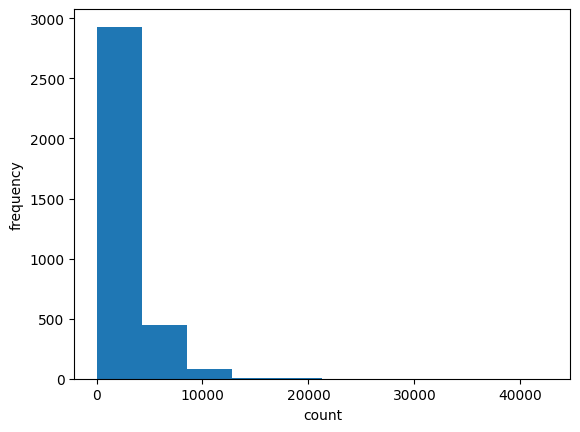

In [ ]:
def get_alpha_numeric_count(s):
  sum = 0
  for i in s:
    if i.isnumeric():
      sum += 1
    elif i.isalpha():
      sum += 1
  return sum

plt.hist([get_alpha_numeric_count(sent) for sent in df['full_text']])
plt.xlabel('count')
plt.ylabel('frequency')
plt.show()

(b) The column leaf label – class on the x-axis:

Text(0.5, 1.0, 'Leaf Label Distribution')

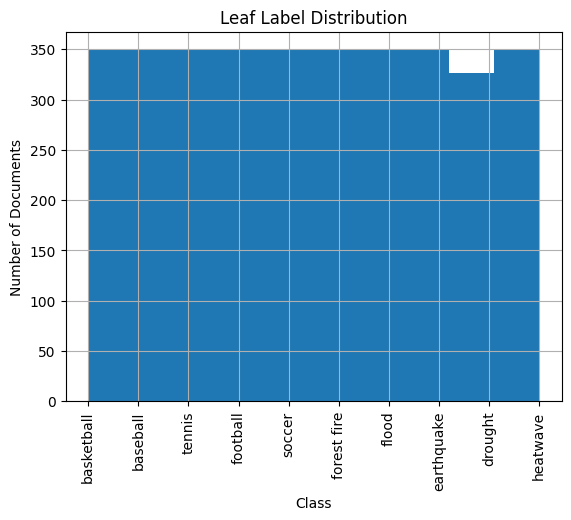

In [ ]:
df["leaf_label"].hist(xrot =90)
plt.ylabel('Number of Documents')
plt.xlabel('Class')
plt.title('Leaf Label Distribution')

(c) The column root label – class on the x-axis:

Text(0.5, 1.0, 'Root Label Distribution')

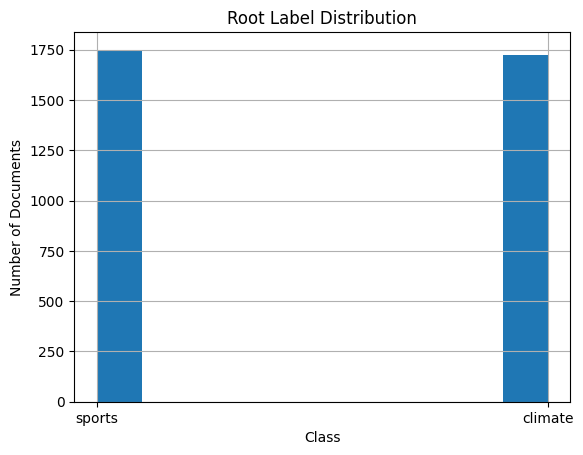

In [ ]:
df["root_label"].hist()
plt.ylabel('Number of Documents')
plt.xlabel('Class')
plt.title('Root Label Distribution')

**Question 1**

How many rows (samples) and columns (features) are present in the dataset?
- rows = 3476
- columns = 8


Histograms: Plot 3 histograms on : all three given above

(a) The total number of alpha-numeric characters per data point (row) in the feature full text: i.e count on the x-axis and frequency on the y-axis:

(b) The column leaf label – class on the x-axis:

(c) The column root label – class on the x-axis:


Provide qualitative interpretations of the histograms.

- From the alpha numeric count for the full text feature, we can see that a majority of the rows have an alpha numeric count is less than 10k.

- From the histogram for leaf label, we can see that there is a pretty even distribution of leaf label topics among the entire dataset.

- For the historgram of root label, there is also an even distribution of labels between sports and climate with all the data.

## Question 2 : Train & Test set

In [ ]:
np.random.seed(42)
random.seed(42)

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df[["full_text","root_label"]], test_size=0.2)

**Question 2**

Report the number of training and testing samples.

- training samples = 2780
- testing samples = 696

## Question 3 : Data Processing

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import re
from nltk.stem import WordNetLemmatizer as wl
from nltk.tag import pos_tag as pt
from nltk import pos_tag
import nltk
wnl = nltk.wordnet.WordNetLemmatizer()
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
def clean(text):
  text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
  texter = re.sub(r"<br />", " ", text)
  texter = re.sub(r"&quot;", "\"",texter)
  texter = re.sub('&#39;', "\"", texter)
  texter = re.sub('\n', " ", texter)
  texter = re.sub(' u '," you ", texter)
  texter = re.sub('`',"", texter)
  texter = re.sub(' +', ' ', texter)
  texter = re.sub(r"(!)\1+", r"!", texter)
  texter = re.sub(r"(\?)\1+", r"?", texter)
  texter = re.sub('&amp;', 'and', texter)
  texter = re.sub('\r', ' ',texter)
  clean = re.compile('<.*?>')
  texter = texter.encode('ascii', 'ignore').decode('ascii')
  texter = re.sub(clean, '', texter)
  if texter == "":
    texter = ""
  return texter

def penn2morphy(penntag):
    """ Converts Penn Treebank tags to WordNet. """
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n'
# def lemmatize_sent_demo(text):
#     # Text input is string, returns array of lowercased strings(words).
#     return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag))
#             for word, tag in pos_tag(nltk.word_tokenize(text))]
def lemmatize_sent(list_word):
    # Text input is string, returns array of lowercased strings(words).
    return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag))
            for word, tag in pos_tag(list_word)]

In [ ]:
train_clean = train
train_clean['full_text'] = train_clean["full_text"].map(clean)

test_clean = test
test_clean['full_text'] = test_clean["full_text"].map(clean)


In [ ]:
from sklearn.feature_extraction import text
stop_words_skt = text.ENGLISH_STOP_WORDS
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words_en = stopwords.words('english')

from string import punctuation
combined_stopwords = set.union(set(stop_words_en),set(punctuation),set(stop_words_skt))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
nltk.download('averaged_perceptron_tagger')
analyzer = CountVectorizer().build_analyzer()
# def stemmed_words(doc):
#     return (stemmer.stem(w) for w in analyzer(doc))
def stem_rmv_punc(doc):
    return (word for word in lemmatize_sent(analyzer(doc)) if word not in combined_stopwords and not word.isdigit())

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(min_df=3, analyzer=stem_rmv_punc)


In [ ]:
X_train_counts = count_vect.fit_transform(train_clean['full_text'])
print(X_train_counts.shape)

(2780, 13287)


In [ ]:
X_test_counts = count_vect.transform(test_clean['full_text'])
X_test_counts.shape

(696, 13287)

In [ ]:
len(count_vect.get_feature_names_out())

13287

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()

# recall that X_train_counts = count_vect.fit_transform(train_clean['full_text'])
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_test_tfidf = tfidf_transformer.fit_transform(X_test_counts)

 **Question 3**

• What are the pros and cons of lemmatization versus stemming? How do these processes affect
the dictionary size?

- Pros of Lemmatization: provides actual base or roote form of word, preferred for information retrieval tasks  
Cons of Lemmatization: lots of complexity and computational cost  
Pros of Stemming: A lot more simpler and computationally efficient  
Cons of Stemming: Stems produced are not the best and doesn't consider context of the word  

- Lemmatization tends to result in a larger dictionary size because there are many grammatical variations for base forms. Stemming tends to result in a shorter size because it reduces words to basic stems, which isn't as large of a variety.

<br>

• min df means minimum document frequency. How does varying min df change the TF-IDF
matrix?

- Higher min df is more selective which reduces the size of the TF-IDF matrix because it focuses on terms that are more common across documents. This can result in a sparse matrix with fewer entries. Lower min df is less selective and increases the size of the TF-IDF matrix because of the larger vocabulary. This can result in a denser matrix.

<br>

• Should I remove stopwords before or after lemmatizing? Should I remove punctuations before or after lemmatizing? Should I remove numbers before or after lemmatizing? Hint: Recall that the full sentence is input into the Lemmatizer and the lemmatizer is tagging the position of every word based on the sentence structure.

- The goal of lemmatization is to reduce a word to its root form and it considers the context of the given sentence to do this. Removing stopwords, numbers, and puctuations can destroy this context of the sentence. Therefore we should remove stopwords, punctuations, and numbers after lemmitization.

<br>

• Report the shape of the TF-IDF-processed train and test matrices. The number of rows should match the results of Question 2. The number of columns should roughly be in the order of kx10^3

- Test Matrix Shape: (696, 13447)
- Train Matrix Shape: (2780, 13447)







# 3 Dimensionality Reduction

## Question 4 : Variance ration, LSI vs NMF

In [ ]:
# SVD explained variance ratio
from sklearn.decomposition import TruncatedSVD

svd_evr = TruncatedSVD(n_components=2000, random_state=42)
X_train_reduced = svd_evr.fit_transform(X_train_tfidf)
X_test_reduced = svd_evr.transform(X_test_tfidf)


In [ ]:
evr = svd_evr.explained_variance_ratio_.cumsum()
print(evr)
evr = [evr[0], evr[9], evr[49], evr[99], evr[199], evr[499], evr[999], evr[1999]]
print(evr)

[0.00662305 0.03175044 0.05072009 ... 0.99433506 0.99438054 0.99442597]
[0.006623049555206013, 0.11891044717685503, 0.2762839437404552, 0.3664451621024311, 0.48035018325651796, 0.6815508993223091, 0.8583092988811805, 0.9944259662780556]


Text(0, 0.5, 'explained ratio variance')

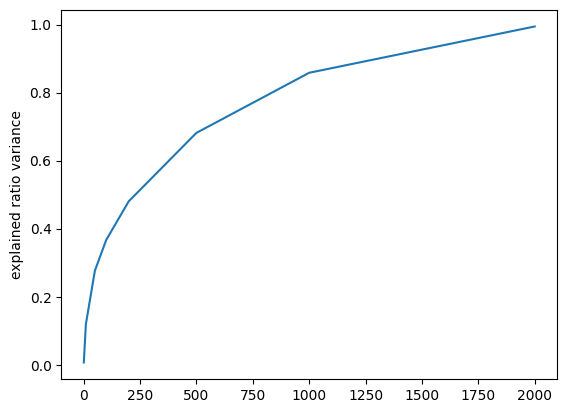

In [ ]:
#from matplotlib import pyplot as plt
x = [1, 10, 50, 100, 200, 500, 1000, 2000]
plt.plot(x, evr)
plt.ylabel('explained ratio variance')

In [ ]:
# LSI
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=50, random_state=42)
X_train_LSI = svd.fit_transform(X_train_tfidf)
X_test_LSI = svd.transform(X_test_tfidf)
print(X_train_LSI.shape)
print(X_test_LSI.shape)

(2780, 50)
(696, 50)


In [ ]:
from sklearn.utils.extmath import randomized_svd
from sklearn.decomposition import NMF

U,S,V = randomized_svd(X_train_tfidf, n_components=50, random_state = 42)
error = np.sum(np.array(X_train_tfidf - U.dot(np.diag(S)).dot(V))**2)
print("LSI error:", error)
nmf = NMF(n_components=50, random_state = 42)
X_train_NMF = nmf.fit_transform(X_train_tfidf)
X_test_NMF = nmf.fit_transform(X_test_tfidf)
error = np.sum(np.array(X_train_tfidf - X_train_NMF.dot(nmf.components_))**2)
print("NMF error:", error)

LSI error: 1947.5144800015685
NMF error: 3118.7340213205093


**Question 4**

• Plot the explained variance ratio across multiple different k = [1, 10, 50, 100, 200, 500, 1000, 2000] for LSI and for the next few sections choose k = 50. What does the explained variance ratio plot look like? What does the plot's concavity suggest?

- Explained variance ratio plotted above!

- The explained variance ratio plot looks like it is concave down. The reason for this is because the more principal components we add the more data can be explained but the rate at which each additional principal component contributes to the explained variance diminishes.

<br>

• With k = 50 found in the previous sections, calculate the reconstruction residual MSE error when using LSI and NMF they both should use the same k = 50. Which one is larger, the NMF or the LSI and why?

- NMF residual error: 3078.0556638139406

- LSI residual error: 1946.6620651321361

- The NMF error is larger than LSI's. Some reasons include: NMF enforces a non-negativity constraint on the factorized matrices, NMF tends to produce sparser representations compared to LSI, and NMF is sensitive to the initial values of the factorized matrice.

# 4 Classification Algorithmns

## Question 5 : SVM

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_curve, auc
def plot_roc(fpr, tpr):
    fig, ax = plt.subplots()

    roc_auc = auc(fpr,tpr)

    ax.plot(fpr, tpr, lw=2, label= 'area under curve = %0.4f' % roc_auc)

    ax.grid(color='0.7', linestyle='--', linewidth=1)

    ax.set_xlim([-0.1, 1.1])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate',fontsize=15)
    ax.set_ylabel('True Positive Rate',fontsize=15)

    ax.legend(loc="lower right")

    for label in ax.get_xticklabels()+ax.get_yticklabels():
        label.set_fontsize(15)

def fit_predict_and_plot_roc(pipe, train_data, train_label, test_data, test_label):
    pipe.fit(train_data, train_label)

    if hasattr(pipe, 'decision_function'):
        prob_score = pipe.decision_function(test_data)
        fpr, tpr, _ = roc_curve(test_label, prob_score)
    else:
        prob_score = pipe.predict_proba(test_data)
        fpr, tpr, _ = roc_curve(test_label, prob_score[:,1])

    plot_roc(fpr, tpr)

In [ ]:
from sklearn.svm import LinearSVC, SVC

# fit on LSI data not tfidf data fixed issue
hard_svm = SVC(C=1000, kernel='linear', random_state=42, probability=True)
hard_svm_predicted = hard_svm.fit(X_train_LSI, train['root_label']).predict(X_test_LSI)
soft_svm = SVC(C=0.0001, kernel='linear', random_state=42, probability=True)
soft_svm_predicted = soft_svm.fit(X_train_LSI, train['root_label']).predict(X_test_LSI)
extra_svm = SVC(C=100000, kernel='linear', random_state=42, probability=True)
extra_svm_predicted = extra_svm.fit(X_train_LSI, train['root_label']).predict(X_test_LSI)

print(hard_svm_predicted.shape)


(696,)


In [ ]:
print(len(test['root_label']))
print(len(hard_svm_predicted))

696
696


In [ ]:
import numpy as np
from sklearn import metrics
fpr_hard, tpr_hard, thresholds_hard = metrics.roc_curve(test['root_label'], hard_svm.decision_function(X_test_LSI), pos_label= 'sports')
fpr_soft, tpr_soft, thresholds_soft = metrics.roc_curve(test['root_label'], soft_svm.decision_function(X_test_LSI), pos_label= 'sports')
fpr_extra, tpr_extra, thresholds_extra = metrics.roc_curve(test['root_label'], extra_svm.decision_function(X_test_LSI), pos_label= 'sports')

Text(0.5, 1.0, 'ROC for C=100000 Margin SVM')

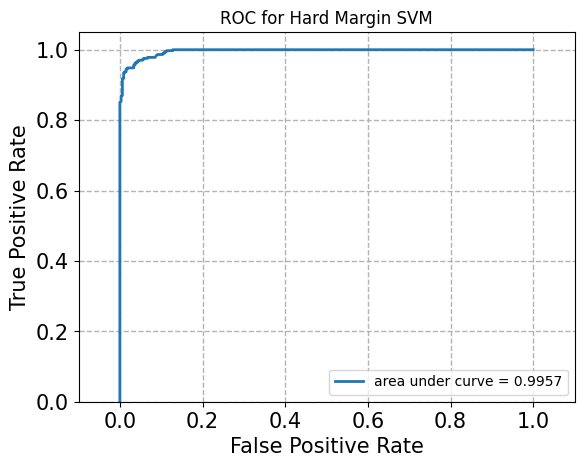

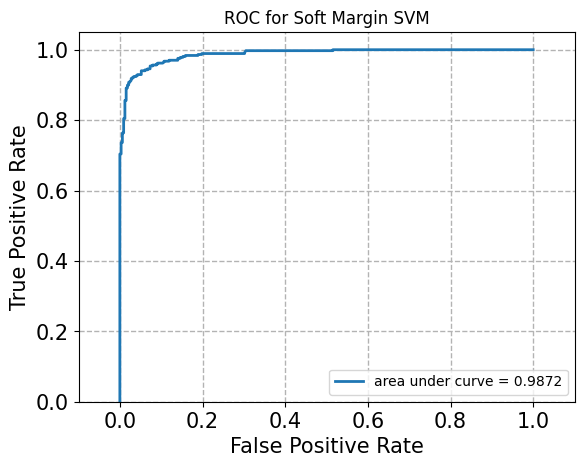

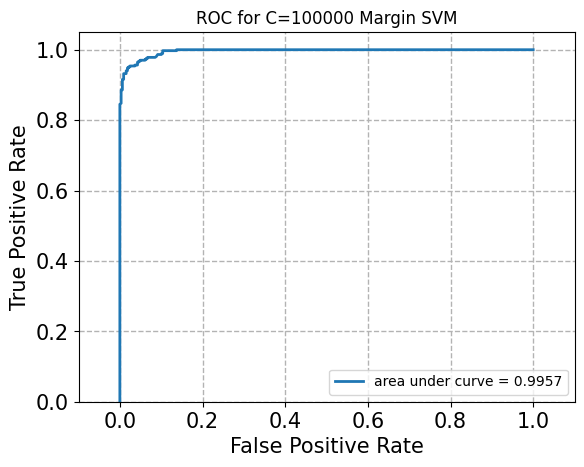

In [ ]:
plot_roc(fpr_hard, tpr_hard)
plt.title('ROC for Hard Margin SVM')

plot_roc(fpr_soft, tpr_soft)
plt.title('ROC for Soft Margin SVM')

plot_roc(fpr_extra, tpr_extra)
plt.title('ROC for C=100000 Margin SVM')

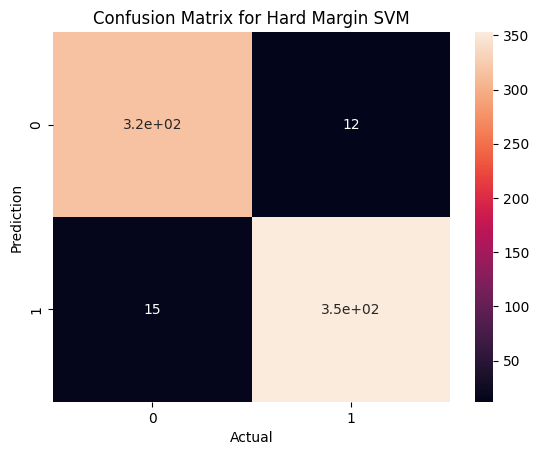

In [ ]:
import seaborn as sns
cm = confusion_matrix(test['root_label'],hard_svm_predicted)
sns.heatmap(cm,annot=True)
plt.ylabel('Prediction')
plt.xlabel('Actual')
plt.title('Confusion Matrix for Hard Margin SVM')
plt.show()

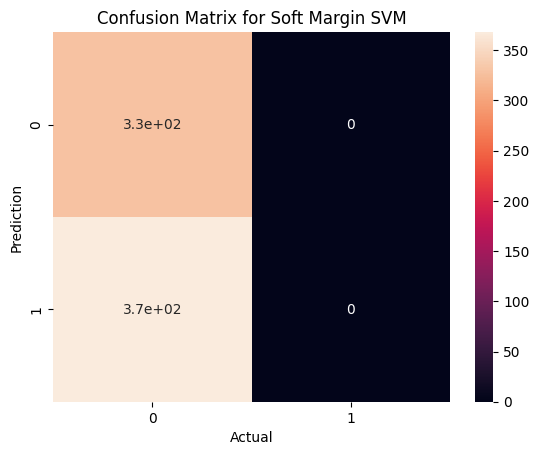

In [ ]:
cm = confusion_matrix(test['root_label'],soft_svm_predicted)
sns.heatmap(cm,annot=True)
plt.ylabel('Prediction')
plt.xlabel('Actual')
plt.title('Confusion Matrix for Soft Margin SVM')
plt.show()

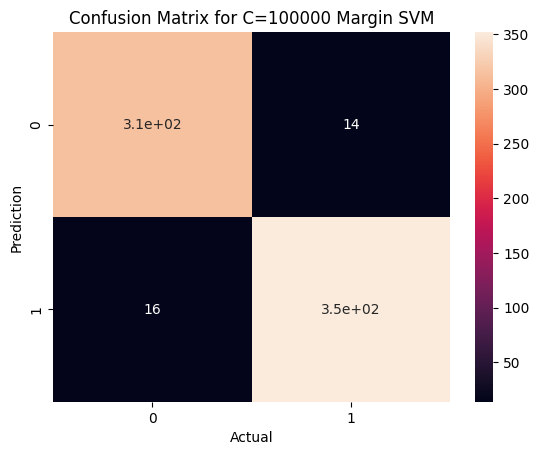

In [ ]:
cm = confusion_matrix(test['root_label'],extra_svm_predicted)
sns.heatmap(cm,annot=True)
plt.ylabel('Prediction')
plt.xlabel('Actual')
plt.title('Confusion Matrix for C=100000 Margin SVM')
plt.show()

In [ ]:
print("Precision for Hard SVM:", precision_score(test['root_label'],hard_svm_predicted, pos_label= 'sports'))
print("Precision for Soft SVM:", precision_score(test['root_label'],soft_svm_predicted, pos_label= 'sports'))
print("Precision for C=100000 SVM:", precision_score(test['root_label'],extra_svm_predicted, pos_label= 'sports'))


print("F1-Score for Hard SVM:", f1_score(test['root_label'],hard_svm_predicted, pos_label= 'sports'))
print("F1-Score for Soft SVM:", f1_score(test['root_label'],soft_svm_predicted, pos_label= 'sports'))
print("F1-Score for C=100000 SVM:", f1_score(test['root_label'],extra_svm_predicted, pos_label= 'sports'))

print("Accuracy for Hard SVM:", accuracy_score(test['root_label'],hard_svm_predicted))
print("Accuracy for Soft SVM:", accuracy_score(test['root_label'],soft_svm_predicted))
print("Accuracy for C=100000 SVM:", accuracy_score(test['root_label'],extra_svm_predicted))

print("Recall for Hard SVM:", recall_score(test['root_label'],hard_svm_predicted, pos_label= 'sports'))
print("Recall for Soft SVM:", recall_score(test['root_label'],soft_svm_predicted, pos_label= 'sports'))
print("Recall for C=100000 SVM:", recall_score(test['root_label'],extra_svm_predicted, pos_label= 'sports'))

Precision for Hard SVM: 0.9671232876712329
Precision for Soft SVM: 0.0
Precision for C=100000 SVM: 0.9617486338797814
F1-Score for Hard SVM: 0.9631650750341064
F1-Score for Soft SVM: 0.0
F1-Score for C=100000 SVM: 0.9591280653950953
Accuracy for Hard SVM: 0.9612068965517241
Accuracy for Soft SVM: 0.47126436781609193
Accuracy for C=100000 SVM: 0.9568965517241379
Recall for Hard SVM: 0.9592391304347826
Recall for Soft SVM: 0.0
Recall for C=100000 SVM: 0.9565217391304348


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.model_selection import GridSearchCV
svm_cv = SVC(kernel='linear', random_state=42)
params = {'C': [0.001,0.01,0.1,1,10,100,1000, 10000, 100000, 1000000]}
grid_search = GridSearchCV(svm_cv,params,cv=5,scoring='accuracy')
grid_search.fit(X_train_LSI,train['root_label'])
predictions_cv = grid_search.best_estimator_.predict(X_test_LSI)
print('Best Value of gamma:',grid_search.best_params_['C'])

Best Value of gamma: 100


Text(0.5, 1.0, 'ROC for C=100 SVM')

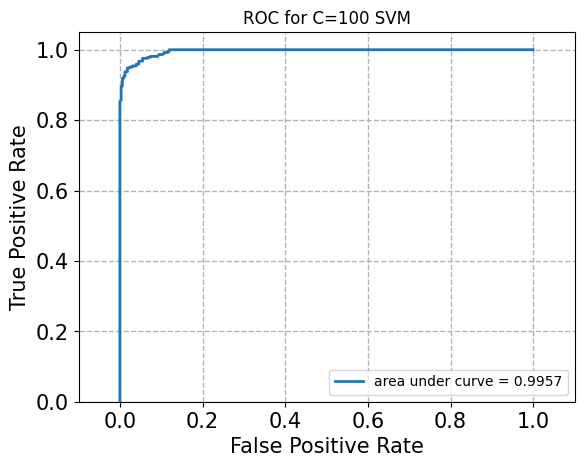

In [ ]:
best_svm = SVC(C=100,kernel='linear', random_state=42, probability=True)
best_svm_predicted = best_svm.fit(X_train_LSI, train['root_label']).predict(X_test_LSI)
fpr_extra, tpr_extra, thresholds_extra = metrics.roc_curve(test['root_label'], best_svm.decision_function(X_test_LSI), pos_label= 'sports')
plot_roc(fpr_extra, tpr_extra)
plt.title('ROC for C=100 SVM')

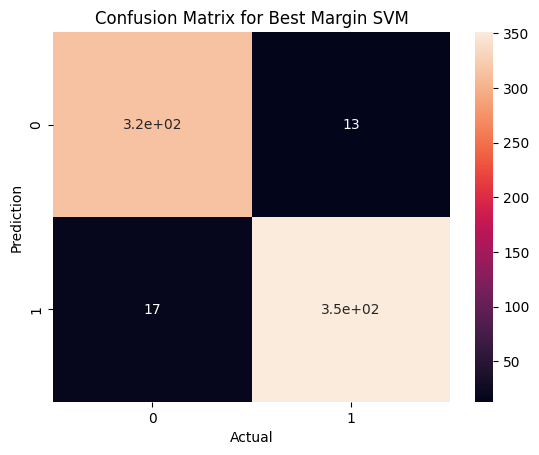

In [ ]:
cm = confusion_matrix(test['root_label'],best_svm_predicted)
sns.heatmap(cm,annot=True)
plt.ylabel('Prediction')
plt.xlabel('Actual')
plt.title('Confusion Matrix for Best Margin SVM')
plt.show()

In [ ]:
print("Precision for C=100 SVM:", precision_score(test['root_label'],best_svm_predicted, pos_label= 'sports'))
print("F1-Score for C=100 SVM:", f1_score(test['root_label'],best_svm_predicted, pos_label= 'sports'))
print("Accuracy for C=100 SVM:", accuracy_score(test['root_label'],best_svm_predicted))
print("Recall for C=100 SVM:", recall_score(test['root_label'],best_svm_predicted, pos_label= 'sports'))

Precision for C=100 SVM: 0.9642857142857143
F1-Score for C=100 SVM: 0.9590163934426229
Accuracy for C=100 SVM: 0.9568965517241379
Recall for C=100 SVM: 0.9538043478260869


**Question 5**

Compare and contrast hard-margin and soft-margin linear SVMs:

• Train two linear SVMs:  
  -Train one SVM with γ = 1000 (hard margin), another with γ = 0.0001 (soft margin).  
  -Plot the ROC curve, report the confusion matrix and calculate the accuracy, recall, precision and F-1 score of both SVM classifiers on the testing set. Which one performs better? What about for γ = 100000?
  
- In 3 of the 4 metrics(recall, accuracy, f1-score), hard svm performed better, but in terms of precision soft svm performed better. When C=100000, it performed better than Soft SVM in all metrics except precision. However for C=100000, it performed worse on all metrics except recall

<br>

• What happens for the soft margin SVM? Why is the case? Analyze in terms of the confusion matrix.
  
  - The soft margin SVM performs poorly and can be seen in the confusion matrix, especially when predicting correctly on class label 1. This is because when gamma is very small(0.0001) the first term in the objective function has a larger impact so there is a higher misclassification rate towards some of the points. This is reflected in the confusion matrix when there are predicitons being made and the model is not able to predict correctly for one class at all, based on both the 0s shown in the matrix.
  
<br>

• Does the ROC curve reflect the performance of the soft-margin SVM? Why?
  
  - The ROC curve does not reflect the performance of the soft-margin SVM because even though the hard-margin SVM and soft-margin SVM have similar ROC curves, the confusion matrix shows how poorly soft-margin performs when predicting for class=1. The ROC curve for soft-margin SVM looks really good because its true positive rate or recall is very high and consistent even when the threshold changes.

<br>

• Use cross-validation to choose γ (use average validation 3 accuracy to compare): Using a 5-fold cross-validation, find the best value of the parameter γ in the range {10k| − 3 ≤ k ≤ 6, k ∈ Z}. Again, plot the ROC curve and report the confusion matrix and calculate the accuracy, recall precision and F-1 score of this best SVM.

- The best parameter for γ is 100.

## Question 6 : Logistic Regression

Text(0.5, 1.0, 'ROC for No Reg Logistic Regression')

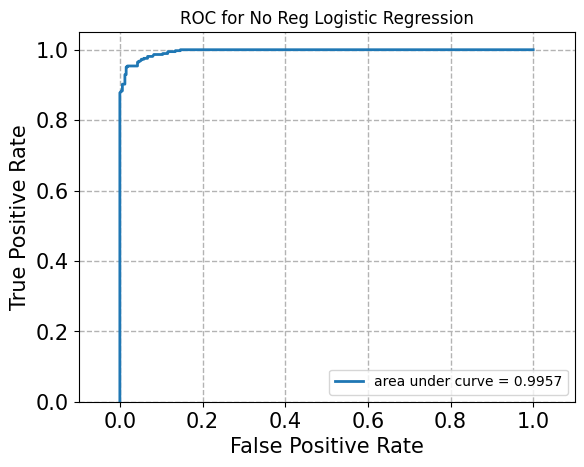

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_no_reg = LogisticRegression(C=1e10,random_state=42, max_iter=1000)
lr_no_reg_predicted = lr_no_reg.fit(X_train_LSI,train['root_label']).predict(X_test_LSI)
fpr_extra, tpr_extra, thresholds_extra = metrics.roc_curve(test['root_label'], lr_no_reg.decision_function(X_test_LSI), pos_label= 'sports')
plot_roc(fpr_extra, tpr_extra)
plt.title('ROC for No Reg Logistic Regression')

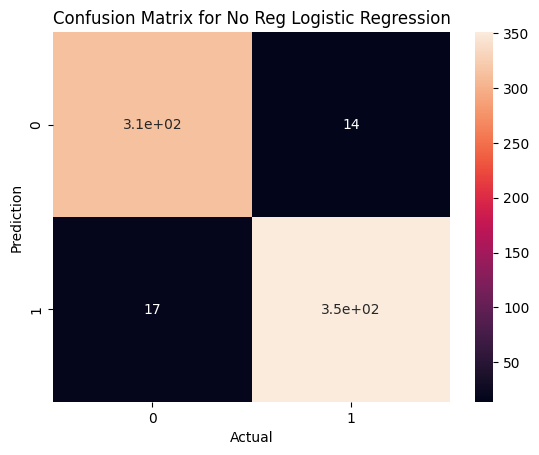

In [ ]:
cm = confusion_matrix(test['root_label'],lr_no_reg_predicted)
sns.heatmap(cm,annot=True)
plt.ylabel('Prediction')
plt.xlabel('Actual')
plt.title('Confusion Matrix for No Reg Logistic Regression')
plt.show()

In [ ]:
l1_lr_cv = LogisticRegression(penalty='l1', random_state=42, max_iter=1000, solver='liblinear')
params = {'C': [0.00001,0.00001,0.001,0.01,0.1,1,10,100,1000, 10000, 100000]}
grid_search = GridSearchCV(l1_lr_cv,params,cv=5,scoring='accuracy')
grid_search.fit(X_train_LSI,train['root_label'])
predictions_cv = grid_search.best_estimator_.predict(X_test_LSI)
print('Best Value of gamma:',grid_search.best_params_['C'])

Best Value of gamma: 10


In [ ]:
l2_lr_cv = LogisticRegression(penalty='l2', random_state=42, max_iter=1000, solver='liblinear')
params = {'C': [0.00001,0.00001,0.001,0.01,0.1,1,10,100,1000, 10000, 100000]}
grid_search = GridSearchCV(l2_lr_cv,params,cv=5,scoring='accuracy')
grid_search.fit(X_train_LSI,train['root_label'])
predictions_cv = grid_search.best_estimator_.predict(X_test_LSI)
print('Best Value of gamma:',grid_search.best_params_['C'])

Best Value of gamma: 10


In [ ]:
lr_l1_reg = LogisticRegression(penalty='l1', C=10,random_state=42, max_iter=1000, solver='liblinear')
lr_l1_reg_predicted = lr_l1_reg.fit(X_train_LSI,train['root_label']).predict(X_test_LSI)
lr_l2_reg = LogisticRegression(penalty='l2', C=10,random_state=42, max_iter=1000)
lr_l2_reg_predicted = lr_l2_reg.fit(X_train_LSI,train['root_label']).predict(X_test_LSI)

In [ ]:
print("Precision for No Reg Logistic Regression:", precision_score(test['root_label'],lr_no_reg_predicted, pos_label= 'sports'))
print("Precision for L1 Reg Logistic Regression", precision_score(test['root_label'],lr_l1_reg_predicted, pos_label= 'sports'))
print("Precision for L2 Reg Logistic Regression", precision_score(test['root_label'],lr_l2_reg_predicted, pos_label= 'sports'))


print("F1-Score for No Reg Logistic Regression:", f1_score(test['root_label'],lr_no_reg_predicted, pos_label= 'sports'))
print("F1-Score for L1 Reg Logistic Regression:", f1_score(test['root_label'],lr_l1_reg_predicted, pos_label= 'sports'))
print("F1-Score for L2 Reg Logistic Regression:", f1_score(test['root_label'],lr_l2_reg_predicted, pos_label= 'sports'))

print("Accuracy for No Reg Logistic Regression:", accuracy_score(test['root_label'],lr_no_reg_predicted))
print("Accuracy for L1 Reg Logistic Regression:", accuracy_score(test['root_label'],lr_l1_reg_predicted))
print("Accuracy for L2 Reg Logistic Regression:", accuracy_score(test['root_label'],lr_l2_reg_predicted))

print("Recall for No Reg Logistic Regression:", recall_score(test['root_label'],lr_no_reg_predicted, pos_label= 'sports'))
print("Recall for L1 Reg Logistic Regression:", recall_score(test['root_label'],lr_l1_reg_predicted, pos_label= 'sports'))
print("Recall for L2 Reg Logistic Regression:", recall_score(test['root_label'],lr_l2_reg_predicted, pos_label= 'sports'))

Precision for No Reg Logistic Regression: 0.9616438356164384
Precision for L1 Reg Logistic Regression 0.967032967032967
Precision for L2 Reg Logistic Regression 0.9643835616438357
F1-Score for No Reg Logistic Regression: 0.9577080491132333
F1-Score for L1 Reg Logistic Regression: 0.9617486338797815
F1-Score for L2 Reg Logistic Regression: 0.9604365620736699
Accuracy for No Reg Logistic Regression: 0.9554597701149425
Accuracy for L1 Reg Logistic Regression: 0.9597701149425287
Accuracy for L2 Reg Logistic Regression: 0.9583333333333334
Recall for No Reg Logistic Regression: 0.9538043478260869
Recall for L1 Reg Logistic Regression: 0.9565217391304348
Recall for L2 Reg Logistic Regression: 0.9565217391304348


**QUESTION 6**

• Train a logistic classifier without regularization (you may need to come up with some way to approximate this if you use sklearn.linear model.LogisticRegression); plot the ROC curve and report the confusion matrix and calculate the accuracy, recall precision and F-1 score of this classifier on the testing set.

<br>
<br>

• Find the optimal regularization coefficient:
  * Using 5-fold cross-validation on the dimension-reduced-by-SVD training data, find the optimal regularization strength in the range {10k|−5 ≤ k ≤ 5, k ∈ Z} for logistic regression with L1 regularization and logistic regression with L2 regularization, respectively.
    - shown above

<br>

  * Compare the performance (accuracy, precision, recall and F-1 score) of 3 logistic classifiers: w/o regularization, w/ L1 regularization and w/ L2 regularization (with the best parameters you found from the part above), using test data.

    - L1 Regularization performed the best on Precision, F1-Score, Accuracy and tied with L2 Regularuzation on Recall.

<br>

  * How does the regularization parameter affect the test error? How are the learnt coefficients affected? Why might one be interested in each type of regularization?
  
    - The regularization parameter in L1 and L2 regularization lowers the test error. In L1 Regularization the penalty term is the sum of the absolute values of the coefficients, whereas in L2 Regularization its the sum of the squares of coefficients. In L1 Regularization, some of the learned coefficients become exactly zero, which completely get rid of impact of some features. In L2 Regularization, more likely makes the learned coefficients very close to 0 but not exactly 0, reducing impact of some features. It's better to use L1 Regularization for feature elimination, when features are irrelevant or redundant. It's better to use L2 Regularization when you want to reduced impact of correlated predictors.

  <br>

  * Both logistic regression and linear SVM are trying to classify data points using a linear decision boundary. What is the difference between their ways to find this boundary? Why do their performances differ? Is this difference statistically significant?

    - For logistic regression, the decision boundary comes from the logistic function and is chosen to maximize the liklihood of the observed data being correctly classified. However, for SVM, the decision boundary comes from the hyperplae that maximizes the margin, which support vectors influence a lot. Performance-wise, SVM are generally more sensitive to outliers, which affect the hyperplane chosen, and tend to perform well on clearly linearly separable data. Logistic regression performs better on cases when the data is not as linearly separable, and is not as sensitive to outliers compared to SVM. The difference in performance can be statistically determined based on important factors like: cross validation, perform t-test or paired test using performance metric, metric choice, quality of data, and outliers.




## Question 7 : GaussianNB

**QUESTION 7:**

Evaluate and profile a Na¨ıve Bayes classifier: Train a GaussianNB classifier; plot
the ROC curve and report the confusion matrix and calculate the accuracy, recall, precision and
F-1 score of this classifier on the testing set.

Text(0.5, 1.0, 'ROC for Naive Bayes')

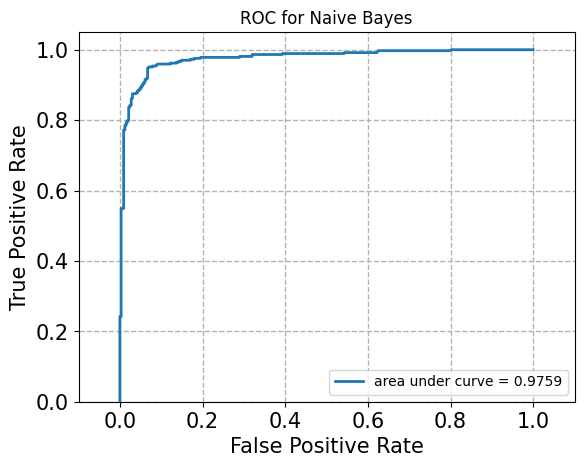

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb_predicted = nb.fit(X_train_LSI, train['root_label']).predict(X_test_LSI)

fpr_nb, tpr_nb, thresholds_nb = metrics.roc_curve(test['root_label'], nb.predict_proba(X_test_LSI)[:,1], pos_label= 'sports')
plot_roc(fpr_nb, tpr_nb)
plt.title('ROC for Naive Bayes')

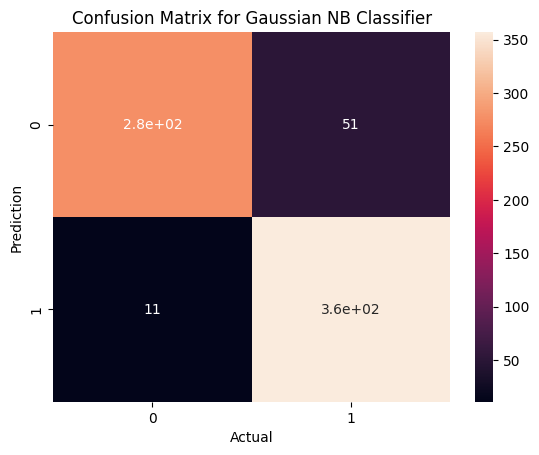

In [ ]:
cm = confusion_matrix(test['root_label'],nb_predicted)
sns.heatmap(cm,annot=True)
plt.ylabel('Prediction')
plt.xlabel('Actual')
plt.title('Confusion Matrix for Gaussian NB Classifier')
plt.show()

In [ ]:
print("Precision for Gaussian NB:", precision_score(test['root_label'],nb_predicted, pos_label= 'sports'))
print("F1-Score for Gaussian NB:", f1_score(test['root_label'],nb_predicted, pos_label= 'sports'))
print("Accuracy for Gaussian NB:", accuracy_score(test['root_label'],nb_predicted))
print("Recall for Gaussian NB:", recall_score(test['root_label'],nb_predicted, pos_label= 'sports'))

Precision for Gaussian NB: 0.875
F1-Score for Gaussian NB: 0.9201030927835052
Accuracy for Gaussian NB: 0.9109195402298851
Recall for Gaussian NB: 0.970108695652174


# Grid Search

## Question 8 : Find Best Model

• Construct a Pipeline that performs feature extraction, dimensionality reduction and classification;

• The evaluation of each combination is performed with 5-fold cross-validation (use the average validation set accuracy across folds)

• In addition to any other hyperparameters you choose, your gridsearch must at least include:

In [ ]:
def lem_rmv_punc(doc):
    return ' '.join([word for word in lemmatize_sent(analyzer(doc)) if word not in combined_stopwords and not word.isdigit()])
def lemmatize_sent(list_word):
    return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag)) for word, tag in pos_tag(list_word)]

lemmatized_train = [lem_rmv_punc(sent) for sent in train_clean['full_text']]
lemmatized_test = [lem_rmv_punc(sent) for sent in test_clean['full_text']]

In [ ]:
sno = nltk.stem.SnowballStemmer('english')
def stem_sent(list_word):
    return [sno.stem(word.lower()) for word in list_word]
def stem_rmv_punc(doc):
    return ' '.join([word for word in stem_sent(analyzer(doc)) if word not in combined_stopwords and not word.isdigit()])
stemmed_train = [stem_rmv_punc(sent) for sent in train_clean['full_text']]
stemmed_test = [stem_rmv_punc(sent) for sent in test_clean['full_text']]

In [ ]:
#WHICH STEMMING TOOL TO USE???
import nltk
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('countVect', CountVectorizer(stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('reduce_dimension', None),
    ('classifiers', None),
]
)

param_grid = [
    {
        'countVect__min_df': (3,5),
        'reduce_dimension': (TruncatedSVD(n_components=5, random_state=42),
                       TruncatedSVD(n_components=30, random_state=42),
                       TruncatedSVD(n_components=80, random_state=42),
                       NMF(n_components=5, random_state=42),
                       NMF(n_components=30, random_state=42),
                       NMF(n_components=80, random_state=42)),
        'classifiers': (SVC(C=100, kernel='linear', random_state=42, probability=True),
                LogisticRegression(penalty='l1', C=10,random_state=42, max_iter=1000, solver='liblinear'),
                LogisticRegression(penalty='l2', C=10,random_state=42, max_iter=1000, solver='liblinear'),
                GaussianNB()),
    }
]

In [ ]:
grid_lem = GridSearchCV(pipeline,cv=5,param_grid=param_grid,scoring='accuracy')
grid_lem.fit(lemmatized_train, list(train['root_label']))

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('countVect',
                                        CountVectorizer(stop_words='english')),
                                       ('tfidf', TfidfTransformer()),
                                       ('reduce_dimension', None),
                                       ('classifiers', None)]),
             param_grid=[{'classifiers': (SVC(C=100, kernel='linear',
                                              probability=True,
                                              random_state=42),
                                          LogisticRegression(C=10,
                                                             max_iter=1000,
                                                             penalty='l1',
                                                             random_state=42,
                                                             solver='liblinear'),
                                          L...
                                                             random_state=42,
                                                             solver='liblinear'),
                                          GaussianNB()),
                          'countVect__min_df': (3, 5),
                          'reduce_dimension': (TruncatedSVD(n_components=5,
                                                            random_state=42),
                                               TruncatedSVD(n_components=30,
                                                            random_state=42),
                                               TruncatedSVD(n_components=80,
                                                            random_state=42),
                                               NMF(n_components=5,
                                                   random_state=42),
                                               NMF(n_components=30,
                                                   random_state=42),
                                               NMF(n_components=80,
                                                   random_state=42))}],
             scoring='accuracy')

In [ ]:
predictions_cv_lem = grid_lem.best_estimator_.predict(lemmatized_test)

In [ ]:
results_l = pd.DataFrame(grid_lem.cv_results_)
results_l.sort_values(by='mean_test_score', inplace=True, ascending=False)
results_l[:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifiers,param_countVect__min_df,param_reduce_dimension,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
32,1.788852,0.536163,0.208929,0.048319,"LogisticRegression(C=10, max_iter=1000, random...",5,"TruncatedSVD(n_components=80, random_state=42)","{'classifiers': LogisticRegression(C=10, max_i...",0.958633,0.965827,0.960432,0.958633,0.962230,0.961151,0.002692,1
20,2.030368,0.545825,0.188403,0.057050,"LogisticRegression(C=10, max_iter=1000, penalt...",5,"TruncatedSVD(n_components=80, random_state=42)","{'classifiers': LogisticRegression(C=10, max_i...",0.964029,0.962230,0.960432,0.955036,0.962230,0.960791,0.003094,2
2,2.068463,0.382638,0.172185,0.051867,"SVC(C=100, kernel='linear', probability=True, ...",3,"TruncatedSVD(n_components=80, random_state=42)","{'classifiers': SVC(C=100, kernel='linear', pr...",0.960432,0.960432,0.962230,0.955036,0.960432,0.959712,0.002440,3
14,1.553022,0.054014,0.166561,0.049501,"LogisticRegression(C=10, max_iter=1000, penalt...",3,"TruncatedSVD(n_components=80, random_state=42)","{'classifiers': LogisticRegression(C=10, max_i...",0.965827,0.962230,0.962230,0.953237,0.955036,0.959712,0.004772,4
26,1.622470,0.299333,0.157869,0.010116,"LogisticRegression(C=10, max_iter=1000, random...",3,"TruncatedSVD(n_components=80, random_state=42)","{'classifiers': LogisticRegression(C=10, max_i...",0.956835,0.962230,0.958633,0.956835,0.962230,0.959353,0.002440,5


In [ ]:
print(grid_lem.best_estimator_)

Pipeline(steps=[('countVect', CountVectorizer(min_df=5, stop_words='english')),
                ('tfidf', TfidfTransformer()),
                ('reduce_dimension',
                 TruncatedSVD(n_components=80, random_state=42)),
                ('classifiers',
                 LogisticRegression(C=10, max_iter=1000, random_state=42,
                                    solver='liblinear'))])


In [ ]:
grid_stem = GridSearchCV(pipeline,cv=5,param_grid=param_grid,scoring='accuracy')
grid_stem.fit(stemmed_train, list(train['root_label']))

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklea

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('countVect',
                                        CountVectorizer(stop_words='english')),
                                       ('tfidf', TfidfTransformer()),
                                       ('reduce_dimension', None),
                                       ('classifiers', None)]),
             param_grid=[{'classifiers': (SVC(C=100, kernel='linear',
                                              probability=True,
                                              random_state=42),
                                          LogisticRegression(C=10,
                                                             max_iter=1000,
                                                             penalty='l1',
                                                             random_state=42,
                                                             solver='liblinear'),
                                          L...
                                                             random_state=42,
                                                             solver='liblinear'),
                                          GaussianNB()),
                          'countVect__min_df': (3, 5),
                          'reduce_dimension': (TruncatedSVD(n_components=5,
                                                            random_state=42),
                                               TruncatedSVD(n_components=30,
                                                            random_state=42),
                                               TruncatedSVD(n_components=80,
                                                            random_state=42),
                                               NMF(n_components=5,
                                                   random_state=42),
                                               NMF(n_components=30,
                                                   random_state=42),
                                               NMF(n_components=80,
                                                   random_state=42))}],
             scoring='accuracy')

In [ ]:
predictions_cv_stem = grid_stem.best_estimator_.predict(stemmed_test)
results = pd.DataFrame(grid_stem.cv_results_)
results.sort_values(by='mean_test_score', inplace=True, ascending=False)
results[:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifiers,param_countVect__min_df,param_reduce_dimension,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
11,17.623265,3.334202,0.371102,0.118950,"SVC(C=100, kernel='linear', probability=True, ...",5,"NMF(n_components=80, random_state=42)","{'classifiers': SVC(C=100, kernel='linear', pr...",0.962230,0.969424,0.958633,0.951439,0.965827,0.961511,0.006189,1
20,1.673228,0.373450,0.180086,0.056430,"LogisticRegression(C=10, max_iter=1000, penalt...",5,"TruncatedSVD(n_components=80, random_state=42)","{'classifiers': LogisticRegression(C=10, max_i...",0.960432,0.960432,0.964029,0.962230,0.953237,0.960072,0.003668,2
14,1.486003,0.025491,0.156491,0.019841,"LogisticRegression(C=10, max_iter=1000, penalt...",3,"TruncatedSVD(n_components=80, random_state=42)","{'classifiers': LogisticRegression(C=10, max_i...",0.962230,0.960432,0.962230,0.960432,0.955036,0.960072,0.002643,2
23,16.992734,3.243806,0.308662,0.009920,"LogisticRegression(C=10, max_iter=1000, penalt...",5,"NMF(n_components=80, random_state=42)","{'classifiers': LogisticRegression(C=10, max_i...",0.956835,0.962230,0.964029,0.956835,0.958633,0.959712,0.002922,4
26,1.782027,0.533129,0.196666,0.040198,"LogisticRegression(C=10, max_iter=1000, random...",3,"TruncatedSVD(n_components=80, random_state=42)","{'classifiers': LogisticRegression(C=10, max_i...",0.958633,0.964029,0.958633,0.955036,0.956835,0.958633,0.003010,5


In [ ]:
print('Top 5 combinations:')
print()
print('1) Params: Stemming', results.iloc[0]['params'], " Mean Test Score:", results.iloc[0]['mean_test_score'])
print('2) Params: Lemmatize', results_l.iloc[0]['params'], " Mean Test Score:", results_l.iloc[0]['mean_test_score'])
print('3) Params: Lemmatize', results_l.iloc[1]['params'], " Mean Test Score:", results_l.iloc[0]['mean_test_score'])
print('4) Params: Stemming', results.iloc[1]['params'], " Mean Test Score:", results.iloc[0]['mean_test_score'])
print('5) Params: Stemming', results.iloc[2]['params'], " Mean Test Score:", results.iloc[0]['mean_test_score'])

Top 5 combinations:

1) Params: Stemming {'classifiers': SVC(C=100, kernel='linear', probability=True, random_state=42), 'countVect__min_df': 5, 'reduce_dimension': NMF(n_components=80, random_state=42)}  Mean Test Score: 0.9615107913669064
2) Params: Lemmatize {'classifiers': LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear'), 'countVect__min_df': 5, 'reduce_dimension': TruncatedSVD(n_components=80, random_state=42)}  Mean Test Score: 0.9611510791366907
3) Params: Lemmatize {'classifiers': LogisticRegression(C=10, max_iter=1000, penalty='l1', random_state=42,
                   solver='liblinear'), 'countVect__min_df': 5, 'reduce_dimension': TruncatedSVD(n_components=80, random_state=42)}  Mean Test Score: 0.9611510791366907
4) Params: Stemming {'classifiers': LogisticRegression(C=10, max_iter=1000, penalty='l1', random_state=42,
                   solver='liblinear'), 'countVect__min_df': 5, 'reduce_dimension': TruncatedSVD(n_components=80, random_state=42)}

**Question 8**

What are the 5 best combinations? Report their performances on the testing set.

- Top 5 combinations:

    1) Params: Stemming {'classifiers': SVC(C=100, kernel='linear', probability=True, random_state=42), 'countVect__min_df': 5, 'reduce_dimension': NMF(n_components=80, random_state=42)}  Mean Test Score: 0.9615107913669064

    2) Params: Lemmatize {'classifiers': LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear'), 'countVect__min_df': 5, 'reduce_dimension': TruncatedSVD(n_components=80, random_state=42)}  Mean Test Score: 0.9611510791366907

    3) Params: Lemmatize {'classifiers': LogisticRegression(C=10, max_iter=1000, penalty='l1', random_state=42,                    solver='liblinear'), 'countVect__min_df': 5, 'reduce_dimension': TruncatedSVD(n_components=80, random_state=42)}  Mean Test Score: 0.9611510791366907

    4) Params: Stemming {'classifiers': LogisticRegression(C=10, max_iter=1000, penalty='l1', random_state=42,                    solver='liblinear'), 'countVect__min_df': 5, 'reduce_dimension': TruncatedSVD(n_components=80, random_state=42)}  Mean Test Score: 0.9615107913669064
                   
    5) Params: Stemming {'classifiers': LogisticRegression(C=10, max_iter=1000, penalty='l1', random_state=42,                    solver='liblinear'), 'countVect__min_df': 3, 'reduce_dimension': TruncatedSVD(n_components=80, random_state=42)}  Mean Test Score: 0.9615107913669064



# Multiclass Classification

## Question 9 : Leaf Label Classification

In [ ]:
map_row_to_class = {0:"basketball", 1:"baseball", 2:"tennis",
3:"football", 4:"soccer", 5:"forest fire", 6:"flood",
7:"earthquake", 8:"drought", 9:"heatwave"}

classes = ['basketball', 'baseball', 'tennis', 'football',
          'soccer', 'forest fire', 'flood', 'earthquake',
          'drought', 'heatwave']

train_mc, test_mc = train_test_split(df[["full_text","leaf_label"]], random_state=42, test_size=0.2)

In [ ]:
# Clean data
train_mc['full_text'] = train_mc['full_text'].map(clean)
test_mc['full_text'] = test_mc["full_text"].map(clean)

# Count Vectorizer
X_train_mc_counts = count_vect.fit_transform(train_mc['full_text'])
X_test_mc_counts = count_vect.transform(test_mc['full_text'])


In [ ]:
print(X_train_mc_counts.shape)
print(X_test_mc_counts.shape)

(2780, 13287)
(696, 13287)


In [ ]:
# Tfidf
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()

X_train_mc_tfidf = tfidf_transformer.fit_transform(X_train_mc_counts)
X_test_mc_tfidf = tfidf_transformer.transform(X_test_mc_counts)

print(X_train_mc_tfidf.shape)
print(X_test_mc_tfidf.shape)

(2780, 13287)
(696, 13287)


In [ ]:
# LSI
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=50, random_state=42)
X_train_mc_LSI = svd.fit_transform(X_train_mc_tfidf)
X_test_mc_LSI = svd.transform(X_test_mc_tfidf)
print(X_train_mc_LSI.shape)
print(X_test_mc_LSI.shape)


(2780, 50)
(696, 50)


Naive Bayes

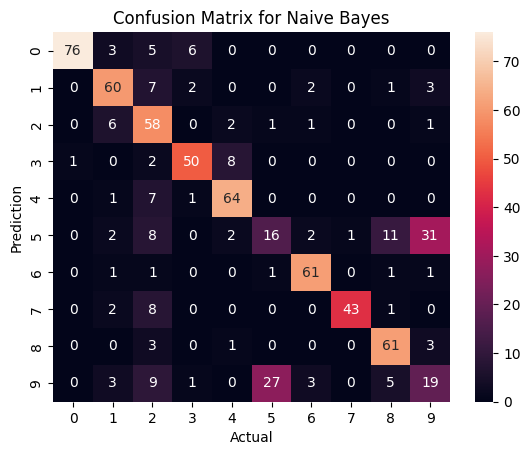

Precision for NB: 0.7264755418522285
F1-Score for NB: 0.7210405701286404
Accuracy for NB: 0.7298850574712644
Recall for NB: 0.7301766330316188


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC, LinearSVC
import seaborn as sns

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb_predicted = nb.fit(X_train_mc_LSI, train_mc['leaf_label']).predict(X_test_mc_LSI)
cm = confusion_matrix(test_mc['leaf_label'],nb_predicted,labels=classes)
sns.heatmap(cm,annot=True)
plt.ylabel('Prediction')
plt.xlabel('Actual')
plt.title('Confusion Matrix for Naive Bayes')
plt.show()

print("Precision for NB:", precision_score(test_mc['leaf_label'],nb_predicted, labels = classes, average='macro'))
print("F1-Score for NB:", f1_score(test_mc['leaf_label'],nb_predicted, labels = classes, average='macro'))
print("Accuracy for NB:", accuracy_score(test_mc['leaf_label'],nb_predicted))
print("Recall for NB:", recall_score(test_mc['leaf_label'],nb_predicted, labels = classes, average='macro'))

SVM (One Vs One)

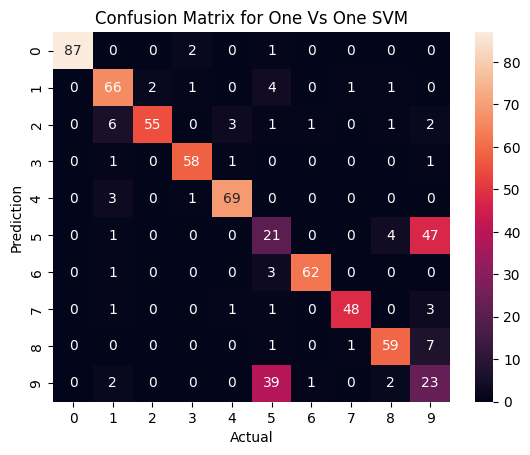

Precision for OVO SVM: 0.8029873495464381
F1-Score for OVO SVM: 0.7933415992056221
Accuracy for OVO SVM: 0.7873563218390804
Recall for OVO SVM: 0.7866677969597853


In [ ]:
# One vs One
ovo_svm = SVC(kernel = 'linear', C = 100, random_state = 42, decision_function_shape = 'ovo')
ovo_svm_predicted = ovo_svm.fit(X_train_mc_LSI, train_mc['leaf_label']).predict(X_test_mc_LSI)

cm = confusion_matrix(test_mc['leaf_label'],ovo_svm_predicted,labels=classes)
sns.heatmap(cm,annot=True)
plt.ylabel('Prediction')
plt.xlabel('Actual')
plt.title('Confusion Matrix for One Vs One SVM')
plt.show()

print("Precision for OVO SVM:", precision_score(test_mc['leaf_label'],ovo_svm_predicted, labels = classes, average='macro'))
print("F1-Score for OVO SVM:", f1_score(test_mc['leaf_label'],ovo_svm_predicted, labels = classes, average='macro'))
print("Accuracy for OVO SVM:", accuracy_score(test_mc['leaf_label'],ovo_svm_predicted))
print("Recall for OVO SVM:", recall_score(test_mc['leaf_label'],ovo_svm_predicted, labels = classes, average='macro'))

SVM (One vs Rest)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


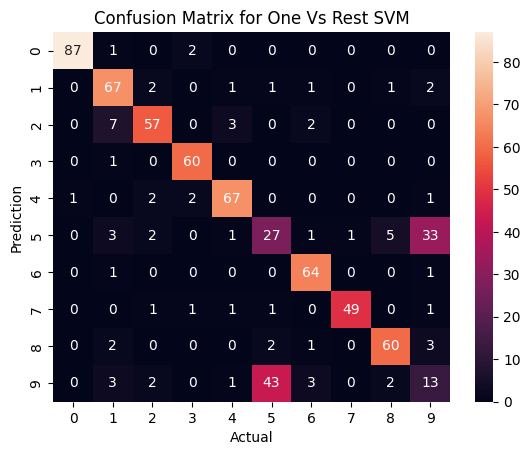

Precision for OVR SVM: 0.7825837785543668
F1-Score for OVR SVM: 0.7857837949764959
Accuracy for OVR SVM: 0.7916666666666666
Recall for OVR SVM: 0.7910851915802617


In [ ]:
# One vs Rest
ovr_svm = LinearSVC(C = 100, random_state = 42)
ovr_svm_predicted = ovr_svm.fit(X_train_mc_LSI, train_mc['leaf_label']).predict(X_test_mc_LSI)

cm = confusion_matrix(test_mc['leaf_label'],ovr_svm_predicted,labels=classes)
sns.heatmap(cm,annot=True)
plt.ylabel('Prediction')
plt.xlabel('Actual')
plt.title('Confusion Matrix for One Vs Rest SVM')
plt.show()

print("Precision for OVR SVM:", precision_score(test_mc['leaf_label'],ovr_svm_predicted, labels = classes, average='macro'))
print("F1-Score for OVR SVM:", f1_score(test_mc['leaf_label'],ovr_svm_predicted, labels = classes, average='macro'))
print("Accuracy for OVR SVM:", accuracy_score(test_mc['leaf_label'],ovr_svm_predicted))
print("Recall for OVR SVM:", recall_score(test_mc['leaf_label'],ovr_svm_predicted, labels = classes, average='macro'))

In [ ]:
print("Precision for OVR SVM:", precision_score(test_mc['leaf_label'],ovr_svm_predicted, labels = classes, average='macro'))
print("F1-Score for OVR SVM:", f1_score(test_mc['leaf_label'],ovr_svm_predicted, labels = classes, average='macro'))
print("Accuracy for OVR SVM:", accuracy_score(test_mc['leaf_label'],ovr_svm_predicted))
print("Recall for OVR SVM:", recall_score(test_mc['leaf_label'],ovr_svm_predicted, labels = classes, average='macro'))

Precision for OVR SVM: 0.7825837785543668
F1-Score for OVR SVM: 0.7857837949764959
Accuracy for OVR SVM: 0.7916666666666666
Recall for OVR SVM: 0.7910851915802617


### Merge Classes

In [ ]:
# Merge 5: forest fire and 9: heatwave
train_merged = train_mc
train_merged['leaf_label'] = train_mc['leaf_label'].replace('heatwave', 'fire')
train_merged['leaf_label']= train_mc['leaf_label'].replace('forest fire', 'fire')

test_merged = test_mc
test_merged['leaf_label'] = test_mc['leaf_label'].replace('heatwave', 'fire')
test_merged['leaf_label'] = test_mc['leaf_label'].replace('forest fire', 'fire')

# Put merged class at 5
classes_merged = ['basketball', 'baseball', 'tennis', 'football',
          'soccer', 'fire', 'flood', 'earthquake',
          'drought']

SVM (One vs One)

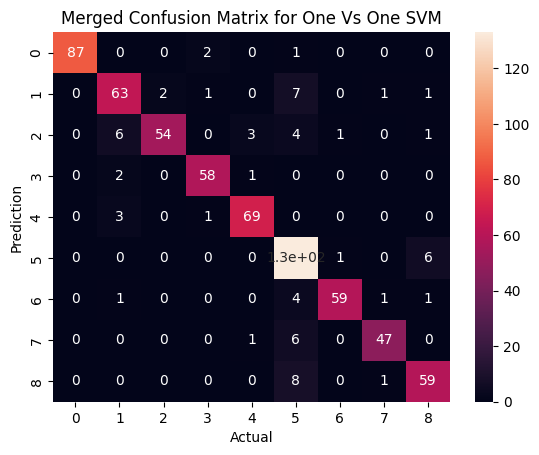

Precision for Merged OVO SVM: 0.9181125679454349
F1-Score for Merged OVO SVM: 0.9052700720302549
Accuracy for Merged OVO SVM: 0.9037356321839081
Recall for Merged OVO SVM: 0.8963619263372595


In [ ]:
# One vs One
ovo_svm = SVC(kernel = 'linear', C = 100, random_state = 42, decision_function_shape = 'ovo')
ovo_svm_predicted = ovo_svm.fit(X_train_mc_LSI, train_merged['leaf_label']).predict(X_test_mc_LSI)

cm = confusion_matrix(test_merged['leaf_label'],ovo_svm_predicted,labels=classes_merged)
sns.heatmap(cm,annot=True)
plt.ylabel('Prediction')
plt.xlabel('Actual')
plt.title('Merged Confusion Matrix for One Vs One SVM')
plt.show()

print("Precision for Merged OVO SVM:", precision_score(test_merged['leaf_label'],ovo_svm_predicted, labels = classes_merged, average='macro'))
print("F1-Score for Merged OVO SVM:", f1_score(test_merged['leaf_label'],ovo_svm_predicted, labels = classes_merged, average='macro'))
print("Accuracy for Merged OVO SVM:", accuracy_score(test_merged['leaf_label'],ovo_svm_predicted))
print("Recall for Merged OVO SVM:", recall_score(test_merged['leaf_label'],ovo_svm_predicted, labels = classes_merged, average='macro'))

SVM (One vs Rest)

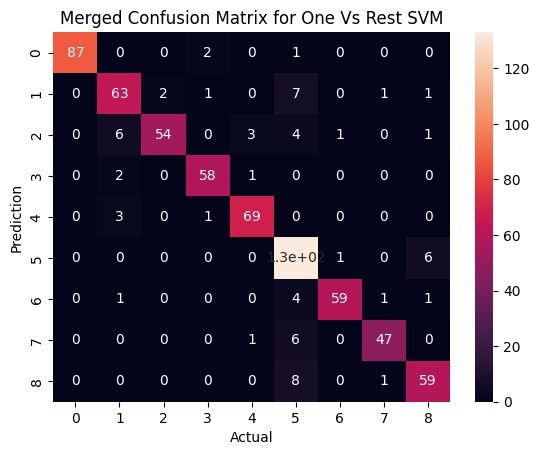

Precision for Merged OVR SVM: 0.9181125679454349
F1-Score for Merged OVR SVM: 0.9052700720302549
Accuracy for Merged OVR SVM: 0.9037356321839081
Recall for Merged OVR SVM: 0.8963619263372595


In [ ]:
# One vs Rest
ovr_svm = SVC(kernel = 'linear', C = 100, random_state = 42, decision_function_shape='ovr')
ovr_svm_predicted = ovr_svm.fit(X_train_mc_LSI, train_merged['leaf_label']).predict(X_test_mc_LSI)

cm = confusion_matrix(test_merged['leaf_label'],ovr_svm_predicted,labels=classes_merged)
sns.heatmap(cm,annot=True)
plt.ylabel('Prediction')
plt.xlabel('Actual')
plt.title('Merged Confusion Matrix for One Vs Rest SVM')
plt.show()

print("Precision for Merged OVR SVM:", precision_score(test_merged['leaf_label'],ovr_svm_predicted, labels = classes_merged, average='macro'))
print("F1-Score for Merged OVR SVM:", f1_score(test_merged['leaf_label'],ovr_svm_predicted, labels = classes_merged, average='macro'))
print("Accuracy for Merged OVR SVM:", accuracy_score(test_merged['leaf_label'],ovr_svm_predicted))
print("Recall for Merged OVR SVM:", recall_score(test_merged['leaf_label'],ovr_svm_predicted, labels = classes_merged, average='macro'))

### Balance Data

In [ ]:
# Get count of each class
print(train_merged.groupby("leaf_label").count())
print(test_merged.groupby("leaf_label").count())

train_sample = train_merged.groupby("leaf_label").sample(n=258, random_state=42)
test_sample = test_merged.groupby("leaf_label").sample(n=54, random_state=42)

            full_text
leaf_label           
baseball          275
basketball        260
drought           258
earthquake        296
fire              560
flood             284
football          289
soccer            277
tennis            281
            full_text
leaf_label           
baseball           75
basketball         90
drought            68
earthquake         54
fire              140
flood              66
football           61
soccer             73
tennis             69


In [ ]:
print(train_sample.groupby("leaf_label").count())
print(test_sample.groupby("leaf_label").count())

            full_text
leaf_label           
baseball          258
basketball        258
drought           258
earthquake        258
fire              258
flood             258
football          258
soccer            258
tennis            258
            full_text
leaf_label           
baseball           54
basketball         54
drought            54
earthquake         54
fire               54
flood              54
football           54
soccer             54
tennis             54


In [ ]:
# Clean data
train_sample['full_text'] = train_sample['full_text'].map(clean)
test_sample['full_text'] = test_sample['full_text'].map(clean)

# Count Vectorizer
X_train_sample_counts = count_vect.fit_transform(train_sample['full_text'])
X_test_sample_counts = count_vect.transform(test_sample['full_text'])

# Tfidf
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()

X_train_sample_tfidf = tfidf_transformer.fit_transform(X_train_sample_counts)
X_test_sample_tfidf = tfidf_transformer.fit_transform(X_test_sample_counts)

print(X_train_mc_tfidf.shape)

# LSI
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=50, random_state=42)
X_train_sample_LSI = svd.fit_transform(X_train_sample_tfidf)
X_test_sample_LSI = svd.fit_transform(X_test_sample_tfidf)


(2780, 13287)


SVM (One vs One)

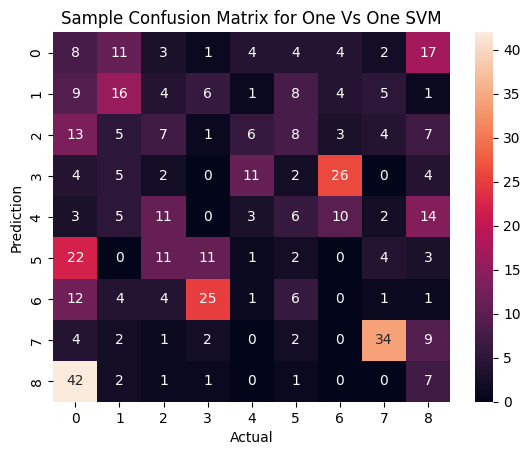

Precision for Sample OVO SVM: 0.1638686005352672
F1-Score for Sample OVO SVM: 0.15804100915489652
Accuracy for Sample OVO SVM: 0.15843621399176955
Recall for Sample OVO SVM: 0.15843621399176955


In [ ]:
ovo_svm = SVC(kernel = 'linear', C = 100, random_state = 42, decision_function_shape='ovo')
ovo_svm_predicted = ovo_svm.fit(X_train_sample_LSI, train_sample['leaf_label']).predict(X_test_sample_LSI)

cm = confusion_matrix(test_sample['leaf_label'],ovo_svm_predicted,labels=classes_merged)
sns.heatmap(cm,annot=True)
plt.ylabel('Prediction')
plt.xlabel('Actual')
plt.title('Sample Confusion Matrix for One Vs One SVM')
plt.show()

print("Precision for Sample OVO SVM:", precision_score(test_sample['leaf_label'],ovo_svm_predicted, labels = classes_merged, average='macro'))
print("F1-Score for Sample OVO SVM:", f1_score(test_sample['leaf_label'],ovo_svm_predicted, labels = classes_merged, average='macro'))
print("Accuracy for Sample OVO SVM:", accuracy_score(test_sample['leaf_label'],ovo_svm_predicted))
print("Recall for Sample OVO SVM:", recall_score(test_sample['leaf_label'],ovo_svm_predicted, labels = classes_merged, average='macro'))

SVM (One vs Rest)

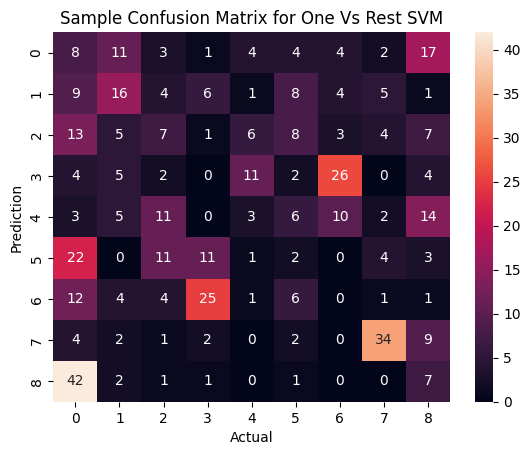

Precision for Sample OVR SVM: 0.1638686005352672
F1-Score for Sample OVR SVM: 0.15804100915489652
Accuracy for Sample OVR SVM: 0.15843621399176955
Recall for Sample OVR SVM: 0.15843621399176955


In [ ]:
ovr_svm = SVC(kernel = 'linear', C = 100, random_state = 42, decision_function_shape='ovr')
ovr_svm_predicted = ovr_svm.fit(X_train_sample_LSI, train_sample['leaf_label']).predict(X_test_sample_LSI)

cm = confusion_matrix(test_sample['leaf_label'],ovr_svm_predicted,labels=classes_merged)
sns.heatmap(cm,annot=True)
plt.ylabel('Prediction')
plt.xlabel('Actual')
plt.title('Sample Confusion Matrix for One Vs Rest SVM')
plt.show()

print("Precision for Sample OVR SVM:", precision_score(test_sample['leaf_label'],ovr_svm_predicted, labels = classes_merged, average='macro'))
print("F1-Score for Sample OVR SVM:", f1_score(test_sample['leaf_label'],ovr_svm_predicted, labels = classes_merged, average='macro'))
print("Accuracy for Sample OVR SVM:", accuracy_score(test_sample['leaf_label'],ovr_svm_predicted))
print("Recall for Sample OVR SVM:", recall_score(test_sample['leaf_label'],ovr_svm_predicted, labels = classes_merged, average='macro'))

### #9

**QUESTION 9:**

• Perform Na¨ıve Bayes classification and multiclass SVM classification (with both One VS One and One VS the rest methods described above) and report the confusion matrix and calculate the accuracy, recall, precision and F-1 score of your classifiers. How did you resolve the class
imbalance issue in the One VS the rest model?*

- To resolve the class imbalance issue, we can take a sample of the same size of data from each category so that the classes are balanced.


<br>

• Do you observe any structure in the confusion matrix? Are there distinct visible blocks on the major diagonal? What does this mean?*

- Yes there are distint blocks along the diagonal meaning that the most of the predicted labels match the actual labels. We can also see that for labels 5 and 9, the classifier mislabels the data between the two quite often.

<br>

• Based on your observation from the previous part, suggest a subset of labels that should be merged into a new larger label and recompute the accuracy and plot the confusion matrix. How did the accuracy change in One VS One and One VS the rest.*

- We should merge forest fire and heatwave into a larger label called 'fire'. We can see that accuracy for both OVO and OVR increased from around 10%.

<br>

• Does class imbalance impact the performance of the classification once some classes are merged? Provide a resolution for the class imbalance and recompute the accuracy and plot the confusion matrix in One VS One and One VS the rest.*

- Class imbalance can cause the classifier to be biased toward the majority class causing the accuraccy to be high even though overall performance might be poor.

# GLoVE Embedding

## Question 10 : GLoVE Paper Read

QUESTION 10:

Read the paper about GLoVE embeddings - found here and answer the following subquestions:


(a) Why are GLoVE embeddings trained on the ratio of co-occurrence probabilities rather than the probabilities themselves?
- Compared to the raw probabilities, the ratio is better able to distinguish relevant words from irrelevant words and it is also better able to discriminate between the two relevant words.

<br>

(b) In the two sentences: “James is running in the park.” and “James is running for the presidency.”, would GLoVE embeddings return the same vector for the word running in both cases? Why or why not?

- No, the GLoVE embedding return will not return the same vector. GLoVE embedding vectorizes the word by the ratio of co-occurence probabilities. The word "running" used with "park", and used with "presidency" would therefore result in a different vector.

<br>

(c) What do you expect for the values of,
||GLoVE["woman"] - GLoVE["man"]||2, ||GLoVE["wife"] - GLoVE["husband"]||2 and
||GLoVE["wife"] - GLoVE["orange"]||2 ? Compare these values.
- ||GLoVE["woman"] - GLoVE["man"]||_2 :  4.7539396
- ||GLoVE["wife"] - GLoVE["husband"]||_2 :  3.1520464
- ||GLoVE["wife"] - GLoVE["orange"]||_2 :  8.667715

<br>

(d) Given a word, would you rather stem or lemmatize the word before mapping it to its GLoVE embedding?
- I will choose lemmatize rather than stem. As GLoVE embedding relies on the relation between words, it is meaningful to consider the context of the words in a given sentence. Furthermore, stemming removes the last few characters from a word which could cause damage to the original word(making it spelled wrong or give incorrect meaning). Generally, lemitizing is a better than stemming because it converts the word to its meaningful base form.

## Question 11

In [ ]:
import os
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

embeddings_dict = {}
dimension_of_glove = 300
with open("/content/drive/MyDrive/ECE ENGR 219/glove/glove.6B.300d.txt", 'r') as f: # if 'r' fails with unicode error, please use 'rb'

  for line in f:
    values = line.split()
    word = values[0]
    vector = np.asarray(values[1:], "float32")
    embeddings_dict[word] = vector


root_folder='/content/drive/MyDrive/ECE ENGR 219'
glove_folder_name='glove'
glove_filename='glove.6B.300d.txt'
glove_path = os.path.abspath(os.path.join(root_folder, glove_folder_name, glove_filename))
word2vec_output_file = glove_filename+'.word2vec'
glove2word2vec(glove_path, word2vec_output_file)
model = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)

<ipython-input-104-25c79b64e87e>:21: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_path, word2vec_output_file)


In [ ]:
from numpy.linalg import norm

arr1 = [embeddings_dict["woman"] - embeddings_dict["man"]]
arr2 = [embeddings_dict["wife"] - embeddings_dict["husband"]]
arr3 = [embeddings_dict["wife"] - embeddings_dict["orange"]]
norm_l2_1 = norm(arr1)  # ||GLoVE["woman"] - GLoVE["man"]||_2
norm_l2_2 = norm(arr2)  # ||GLoVE["wife"] - GLoVE["husband"]||_2
norm_l2_3 = norm(arr3)  # ||GLoVE["wife"] - GLoVE["orange"]||_2

In [ ]:
print("||GLoVE[woman] - GLoVE[man]||_2 : ", norm_l2_1)
print("||GLoVE[wife] - GLoVE[husband]||_2 : ", norm_l2_2)
print("||GLoVE[wife] - GLoVE[orange]||_2 : ", norm_l2_3)

||GLoVE[woman] - GLoVE[man]||_2 :  4.7539396
||GLoVE[wife] - GLoVE[husband]||_2 :  3.1520464
||GLoVE[wife] - GLoVE[orange]||_2 :  8.667715


## Question 11 : GLoVE Embedding Binary Classification

QUESTION 11:

For the binary classification task distinguishing the “sports” class and “climate”class:


(a) Describe a feature engineering process that uses GLoVE word embeddings to represent each document. You have to abide by the following rules:

• A representation of a text segment needs to have a vector dimension that CANNOT exceed the dimension of the GLoVE embedding used per word of the segment.

• You cannot use TF-IDF scores (or any measure that requires looking at the complete dataset) as a pre-processing routine.

• Important: In this section, feel free to use raw features from any column in the original data file not just full text. The column keywords might be useful... or not. Make sure that your result achieves an accuracy of at least 92%.

• To aggregate these words into a single vector consider normalization the vectors, averaging across the vectors.

- Step1: Import data set and split them into train and test data set.
- Step2: Clean and and lemmatize the train set and test set.
- Step3: Open the pre-trained GLoVE model and convert the GLoVE embedding into a word2vec file.
- Step4: Transform the sentences in train and test set to GLoVE features using vectorizer. Each sentence has the same dimension with the GLoVE.





(b) Select a classifier model, train and evaluate it with your GLoVE-based feature. If you are doing any cross-validation, please make sure to use a limited set of options so that your code finishes running in a reasonable amount of time.
- given below

In [ ]:
class Word2VecVectorizer:
    def __init__(self, model):
        print("Loading in word vectors...")
        self.word_vectors = model
        print("Finished loading in word vectors")

    def fit(self, data):
        pass

    def transform(self, data):
        v = self.word_vectors.get_vector('king')
        self.D = v.shape[0]

        X = np.zeros((len(data), self.D))
        n = 0
        emptycount = 0
        for sentence in data:
            tokens = sentence.split()
            vecs = []
            m = 0
            for word in tokens:
                try:
                    vec = self.word_vectors.get_vector(word)
                    vecs.append(vec)
                    m += 1
                except KeyError:
                    pass
            if len(vecs) > 0:
                vecs = np.array(vecs)
                X[n] = vecs.mean(axis=0)
            else:
                emptycount += 1
            n += 1
        print("Number of samples with no words found: %s / %s" % (emptycount, len(data)))
        return X

In [ ]:
vectorizer = Word2VecVectorizer(model)

Loading in word vectors...
Finished loading in word vectors


In [ ]:
train_glove = vectorizer.transform(lemmatized_train)
test_glove = vectorizer.transform(lemmatized_test)

Number of samples with no words found: 0 / 2780
Number of samples with no words found: 0 / 696


In [ ]:
print(train_glove)

[[-0.07284649 -0.01332922 -0.11297492 ... -0.0101648  -0.11148712
   0.09395094]
 [-0.10539048  0.22951683  0.02506633 ... -0.10446478 -0.0394552
  -0.01534163]
 [-0.08559454  0.01144987 -0.10544897 ... -0.1401062   0.05561281
   0.07804989]
 ...
 [-0.10538218  0.18105043  0.03132303 ... -0.11982799 -0.01270362
  -0.05126897]
 [-0.20333721  0.05042237 -0.0310696  ...  0.02129313 -0.06194102
   0.04510168]
 [-0.06115711 -0.10269144 -0.21807997 ... -0.0272742   0.03353392
   0.0140867 ]]


In [ ]:
# just to test if this works

c_glove = SVC(C=10, kernel='linear', random_state=42)

y_pred =  c_glove.fit(train_glove, train["root_label"]).predict(test_glove)


print("train score:", c_glove.score(train_glove, train["root_label"]))
print("test score:", c_glove.score(test_glove, test["root_label"]))

train score: 0.9852517985611511
test score: 0.9612068965517241


In [ ]:
from sklearn import metrics
print(metrics.classification_report(test["root_label"], y_pred,  digits=5))

              precision    recall  f1-score   support

     climate    0.94925   0.96951   0.95928       328
      sports    0.97230   0.95380   0.96296       368

    accuracy                        0.96121       696
   macro avg    0.96078   0.96166   0.96112       696
weighted avg    0.96144   0.96121   0.96123       696



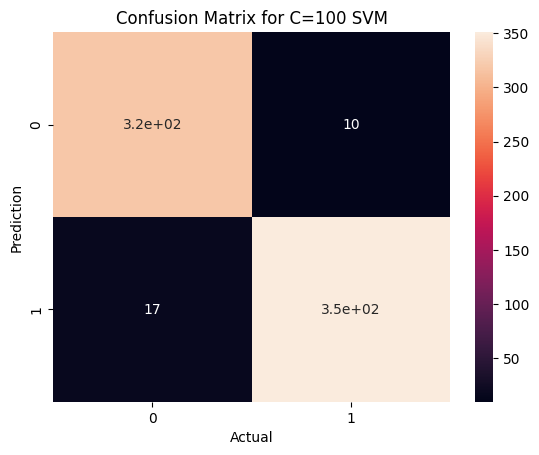

In [ ]:
import seaborn as sns
cm = confusion_matrix(test['root_label'],y_pred)
sns.heatmap(cm,annot=True)
plt.ylabel('Prediction')
plt.xlabel('Actual')
plt.title('Confusion Matrix for C=100 SVM')
plt.show()

## Question 12 : Dimension and Accuracy Relation

QUESTION 12:

Plot the relationship between the dimension of the pre-trained GLoVE embedding
and the resulting accuracy of the model in the classification task.

Describe the observed trend. Is this trend expected? Why or why not?
- The given result is partialy expected.
- The accuracy should increase as the dimension of the pre-trained GLoVE embedding increases, because it is better able to capture more semantics and learn more information. In the practice below, the accuracy got saturated with dimention of 100 and above.

Training for:  glove.6B.50d.txt


<ipython-input-119-13675637d975>:8: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_path, word2vec_output_file)


Loading in word vectors...
Finished loading in word vectors
Number of samples with no words found: 0 / 2780
Number of samples with no words found: 0 / 696
Training for:  glove.6B.100d.txt


<ipython-input-119-13675637d975>:8: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_path, word2vec_output_file)


Loading in word vectors...
Finished loading in word vectors
Number of samples with no words found: 0 / 2780
Number of samples with no words found: 0 / 696
Training for:  glove.6B.200d.txt


<ipython-input-119-13675637d975>:8: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_path, word2vec_output_file)


Loading in word vectors...
Finished loading in word vectors
Number of samples with no words found: 0 / 2780
Number of samples with no words found: 0 / 696
Training for:  glove.6B.300d.txt


<ipython-input-119-13675637d975>:8: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_path, word2vec_output_file)


Loading in word vectors...
Finished loading in word vectors
Number of samples with no words found: 0 / 2780
Number of samples with no words found: 0 / 696


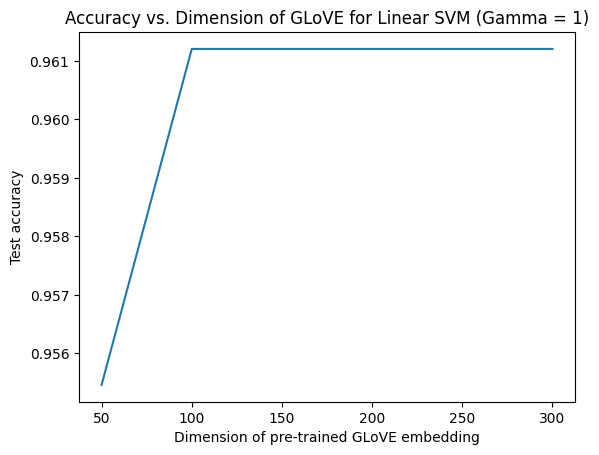

In [ ]:
filenames_glove = ['glove.6B.50d.txt','glove.6B.100d.txt','glove.6B.200d.txt','glove.6B.300d.txt']
accu_list_glove = []
for filename in filenames_glove:
    print('Training for: ', filename)
    glove_filename=filename
    glove_path = os.path.abspath(os.path.join(root_folder, glove_folder_name, glove_filename))
    word2vec_output_file = glove_filename+'.word2vec'
    glove2word2vec(glove_path, word2vec_output_file)
    model = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)
    vectorizer = Word2VecVectorizer(model)
    train_glove = vectorizer.transform(lemmatized_train)
    test_glove = vectorizer.transform(lemmatized_test)
    c_glove = SVC(C=10, kernel='linear', random_state=42)
    pred =  c_glove.fit(train_glove, train["root_label"]).predict(test_glove)
    accu_list_glove.append(accuracy_score(test["root_label"],pred))


# In[55]:


dim_list = [50,100,200,300]
plt.plot(dim_list,accu_list_glove)
plt.title('Accuracy vs. Dimension of GLoVE for Linear SVM (Gamma = 10)')
plt.xlabel('Dimension of pre-trained GLoVE embedding')
plt.ylabel('Test accuracy')
plt.savefig('Q101.png',dpi=300,bbox_inches='tight')
plt.show()

## Question 13 : UMAP Plot

QUESTION 13:

Visualize the set of normalized GLoVE-based embeddings of the documents with their binary labels in a 2D plane using the UMAP library.

Similarly generate a set of normalized random vectors of the same dimension as GLoVE

Compare and contrast the two visualizations. Are there clusters formed in either or both of the plots? We will pursue the clustering aspect further in the next project.
- The set of normalized GLoVE-based embeddings formed a cluster, but the normalized random vectors didn't.

In [ ]:
!pip install umap-learn

!pip install umap-learn[plot]
!pip install holoviews
!pip install -U ipykernel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 5.7 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=60e2775d24c15862241e8153f5a9294dc1b128393c804819946781970937d8c3
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.1/116.1 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.4 MB/s eta 0:00:00
  Attempting uninstall: pyzmq
    Found existing installation: pyzmq 23.2.1
    Uninstalling pyzmq-23.2.1:
      Successfully uninstalled pyzmq-23.2.1
  Attempting uninstall: ipykerne

In [ ]:
import umap
import umap.plot

/usr/local/lib/python3.10/dist-packages/umap/plot.py:203: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit(nopython=False)


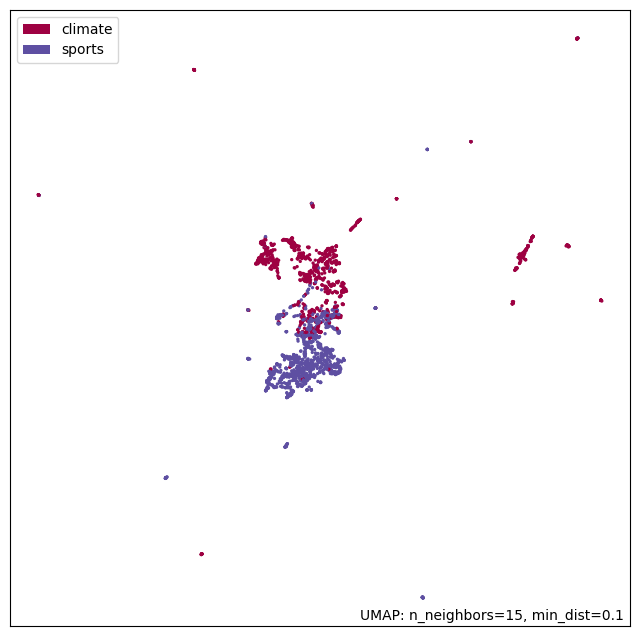

In [ ]:
embedding = umap.UMAP(n_components=2).fit(train_glove)
embedding.embedding_.shape
f = umap.plot.points(embedding, labels=train["root_label"])

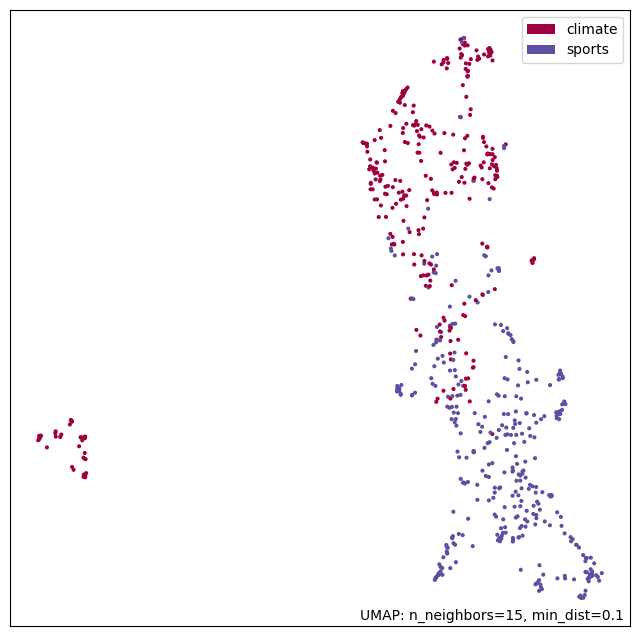

In [ ]:
embedding = umap.UMAP(n_components=2).fit(test_glove)
embedding.embedding_.shape
f = umap.plot.points(embedding, labels=test["root_label"])

In [ ]:
v = np.random.rand(300, 300)
v_hat = v / np.linalg.norm(v)

/usr/local/lib/python3.10/dist-packages/umap/plot.py:449: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(points[:, 0], points[:, 1], s=point_size, c=color)


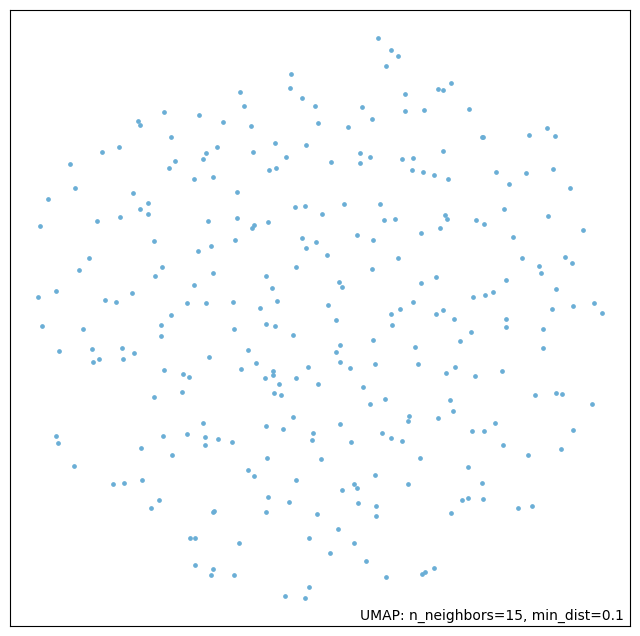

In [ ]:
embedding = umap.UMAP(n_components=2).fit(v_hat)
embedding.embedding_.shape
f = umap.plot.points(embedding)